In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
custseg=pd.read_csv('marketing_campaign.csv',sep="\t") # sep /t formate
custseg.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [2]:
custseg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [3]:
custseg.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [4]:
# Dt_customer should be in pd.datetime format for acccessibility
custseg.Dt_Customer = pd.to_datetime(custseg.Dt_Customer)
custseg['Dt_Customer_month']=custseg.Dt_Customer.dt.month
custseg['Dt_Customer_day']=custseg.Dt_Customer.dt.day
custseg['Dt_Customer_year']=custseg.Dt_Customer.dt.year

/var/folders/7f/gmpqnwqx0lb4nrsz2vqhvgn40000gp/T/ipykernel_14138/976506347.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  custseg.Dt_Customer = pd.to_datetime(custseg.Dt_Customer)


In [5]:
custseg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [6]:
custseg.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Dt_Customer_month       0
Dt_Customer_day         0
Dt_Customer_year        0
dtype: int64

In [7]:
custseg[custseg['Income'].isnull()==True]
# appears to be random survey like missing 
# missing valuyes with be dealt with by mapping numerical feature to categorical feature decomposing into income groups

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Dt_Customer_month,Dt_Customer_day,Dt_Customer_year
10,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,...,0,0,0,0,3,11,0,11,15,2013
27,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,...,0,0,0,0,3,11,0,2,20,2013
43,7281,1959,PhD,Single,NaN,0,0,2013-05-11,80,81,...,0,0,0,0,3,11,0,5,11,2013
48,7244,1951,Graduation,Single,NaN,2,1,2014-01-01,96,48,...,0,0,0,0,3,11,0,1,1,2014
58,8557,1982,Graduation,Single,NaN,1,0,2013-06-17,57,11,...,0,0,0,0,3,11,0,6,17,2013
71,10629,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,...,0,0,0,0,3,11,0,9,14,2012
90,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,...,0,0,0,0,3,11,0,11,19,2012
91,9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,...,0,0,0,0,3,11,0,5,27,2014
92,5798,1973,Master,Together,NaN,0,0,2013-11-23,87,445,...,0,0,0,0,3,11,0,11,23,2013
128,8268,1961,PhD,Married,NaN,0,1,2013-11-07,23,352,...,0,0,0,0,3,11,0,11,7,2013


In [8]:
categoricalfeat=[f for f in custseg.columns if custseg[f].dtype=='O']
for f in categoricalfeat:
    if custseg[f].nunique() > 10:
        print(' more than 10 cateogires overwhelming for display for feature {}'.format(f))
        break
    else:
        print(custseg[f].value_counts())

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64


In [9]:
from sklearn.preprocessing import LabelEncoder
# map strings to int for  proprocess data for statistical modeling 
Label_Encoder = LabelEncoder()
for f in categoricalfeat:
    custseg[[f]] = custseg[[f]].apply(Label_Encoder.fit_transform)

In [10]:
custseg[categoricalfeat]

,Education,Marital_Status
0,2,4
1,2,4
2,2,5
3,2,5
4,4,3
...,...,...
2235,2,3
2236,4,5
2237,2,2
2238,3,5


In [11]:
numericalfeat=[f for f in custseg.columns if (custseg[f].dtype!='O') & (custseg[f].dtype!='datetime64[ns]')]
for f in numericalfeat:
    if custseg[f].nunique() > 10:
        print(' more than 10 unique values overwhelming for display for feature {}'.format(f))
        continue
    else:
        print("numerical feature {} has the unqiue values {} ".format(f,custseg[f].unique()))  

 more than 10 unique values overwhelming for display for feature ID
 more than 10 unique values overwhelming for display for feature Year_Birth
numerical feature Education has the unqiue values [2 4 3 1 0] 
numerical feature Marital_Status has the unqiue values [4 5 3 2 6 1 0 7] 
 more than 10 unique values overwhelming for display for feature Income
numerical feature Kidhome has the unqiue values [0 1 2] 
numerical feature Teenhome has the unqiue values [0 1 2] 
 more than 10 unique values overwhelming for display for feature Recency
 more than 10 unique values overwhelming for display for feature MntWines
 more than 10 unique values overwhelming for display for feature MntFruits
 more than 10 unique values overwhelming for display for feature MntMeatProducts
 more than 10 unique values overwhelming for display for feature MntFishProducts
 more than 10 unique values overwhelming for display for feature MntSweetProducts
 more than 10 unique values overwhelming for display for feature M

/var/folders/7f/gmpqnwqx0lb4nrsz2vqhvgn40000gp/T/ipykernel_14138/703447633.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f2, (ax_box2, ax_hist2) = plt.subplots(nrows=2, sharex=True,gridspec_kw={"height_ratios" : (0.25, 0.75)},figsize=figsize)


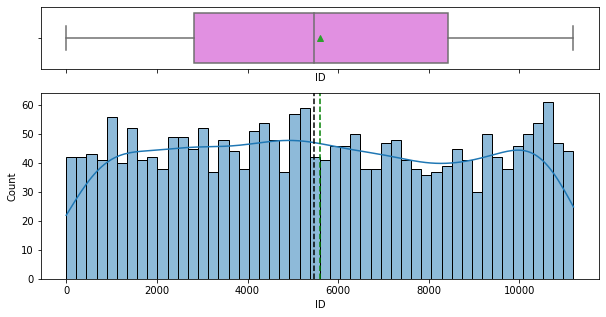

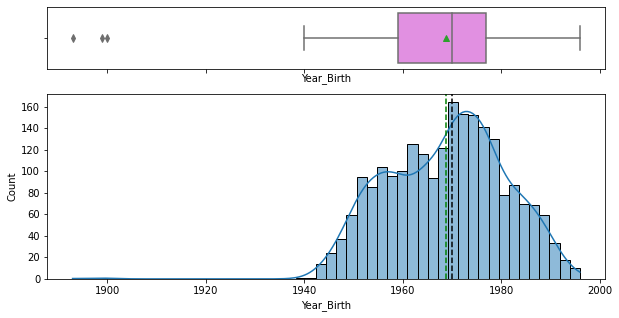

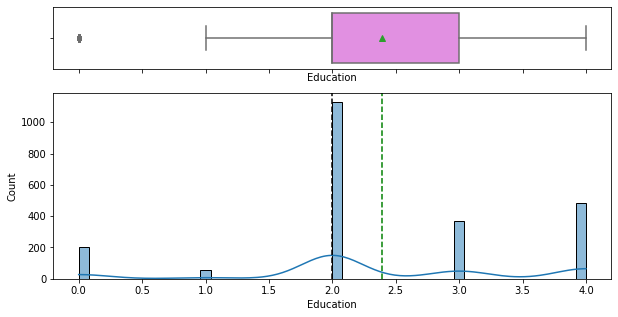

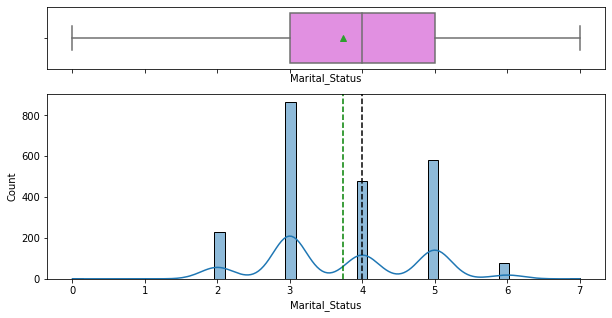

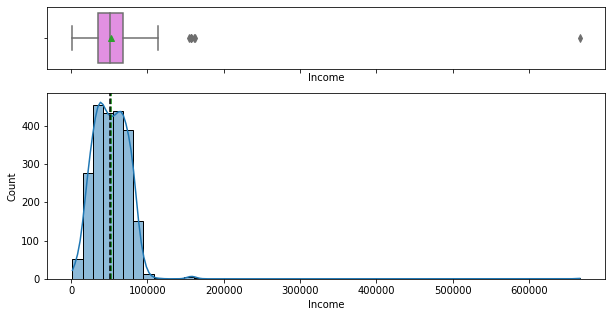

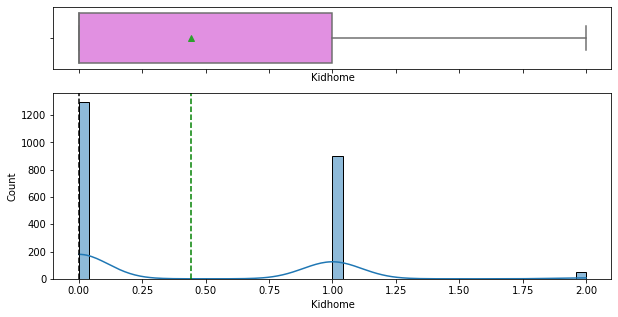

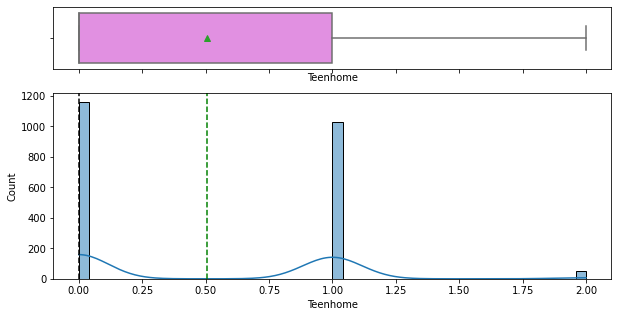

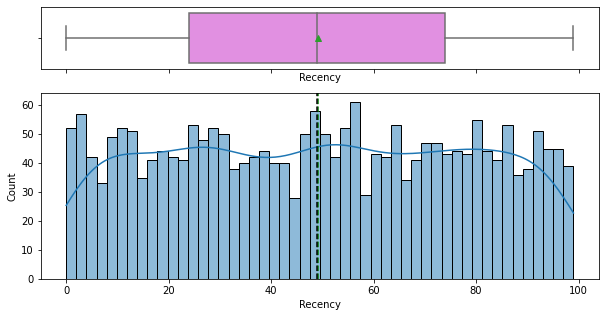

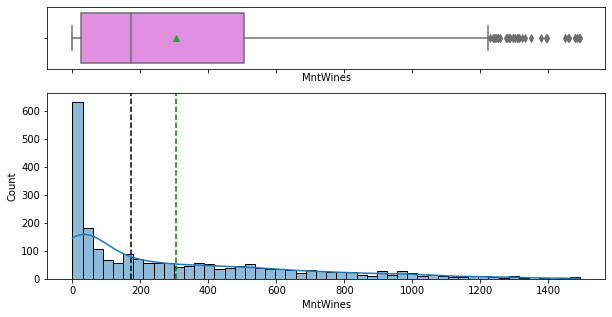

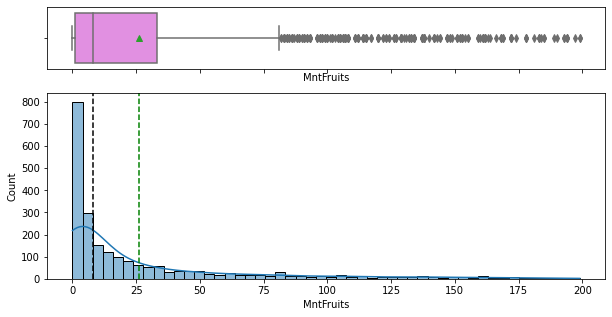

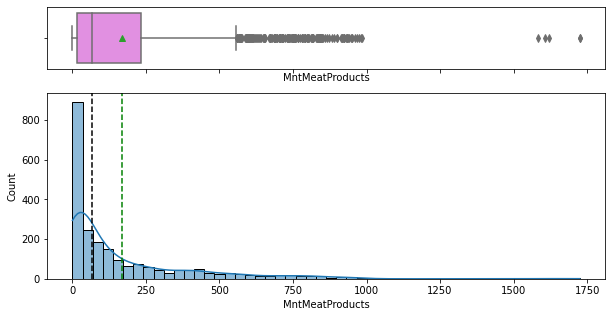

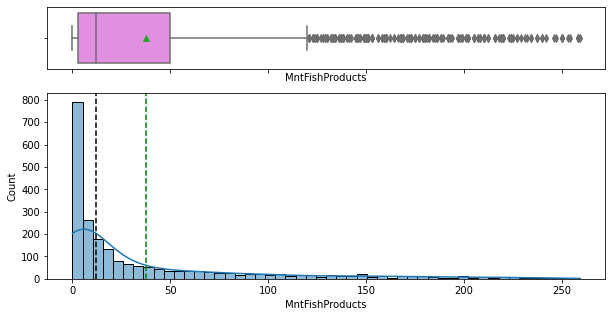

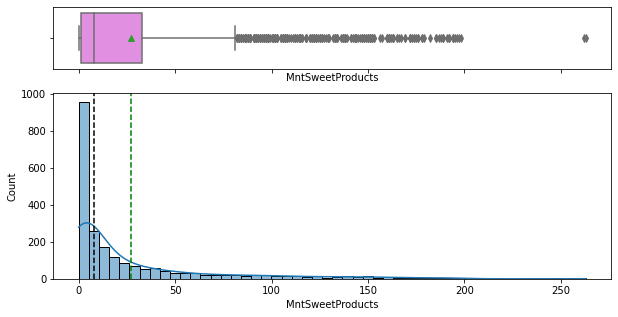

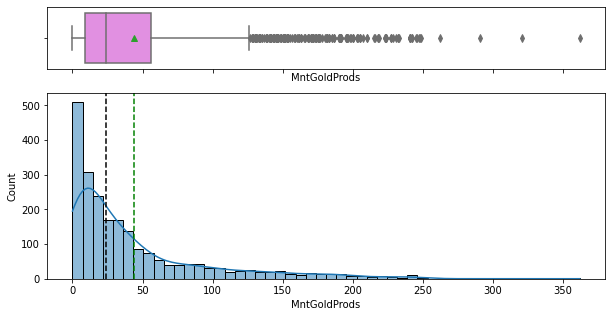

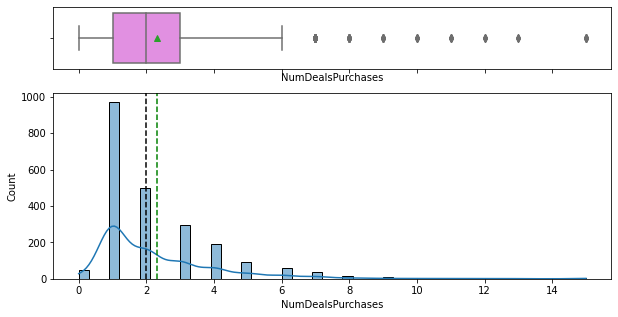

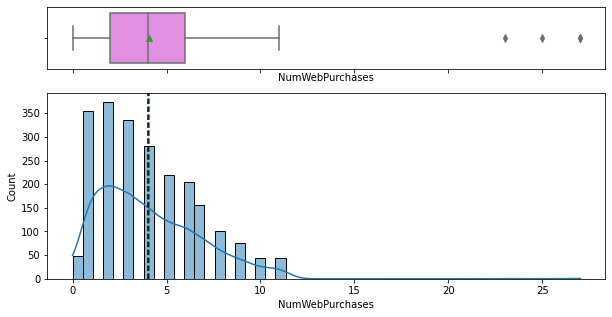

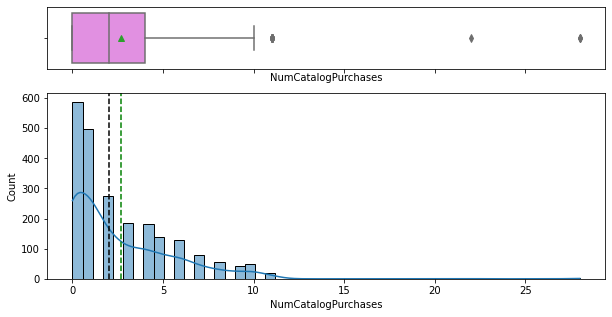

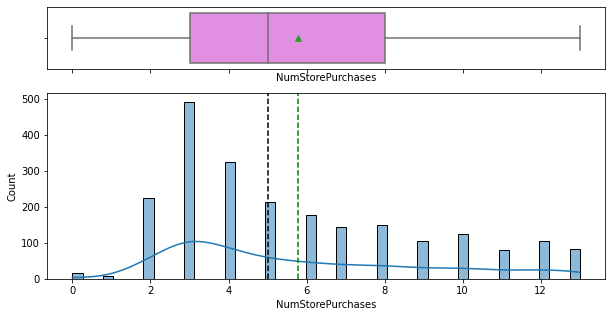

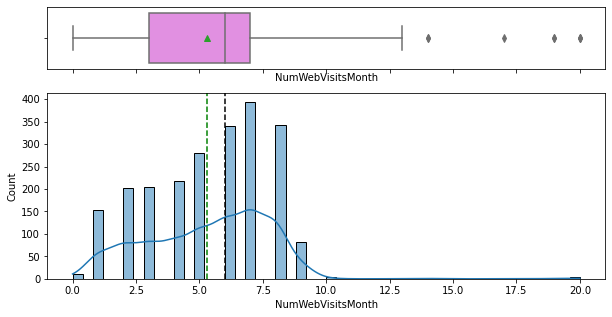

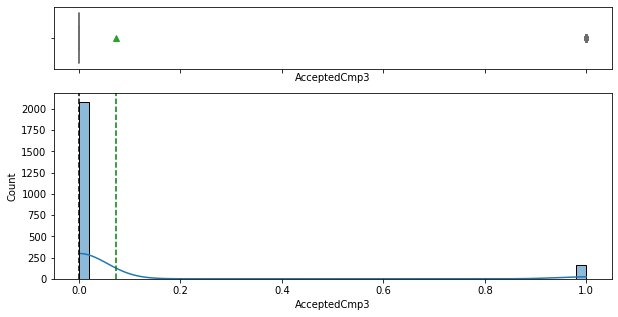

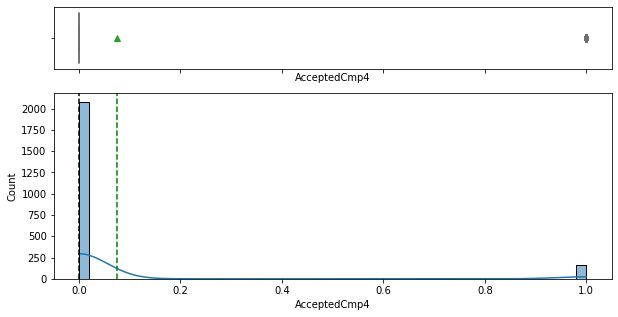

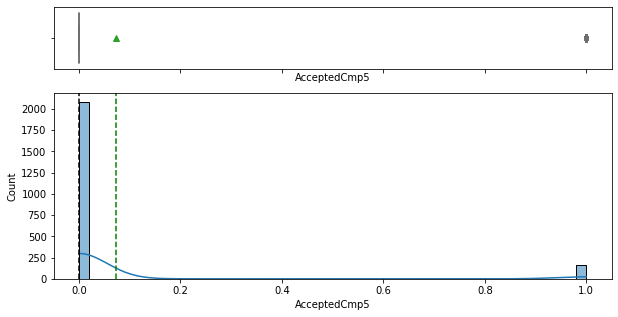

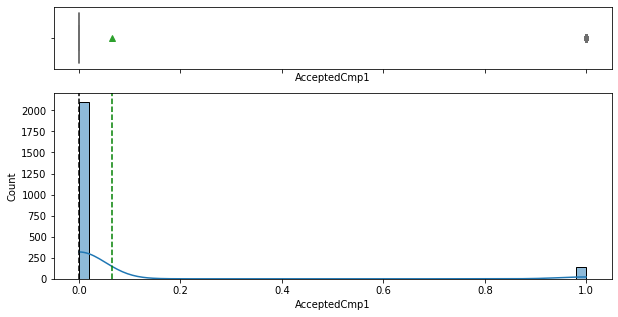

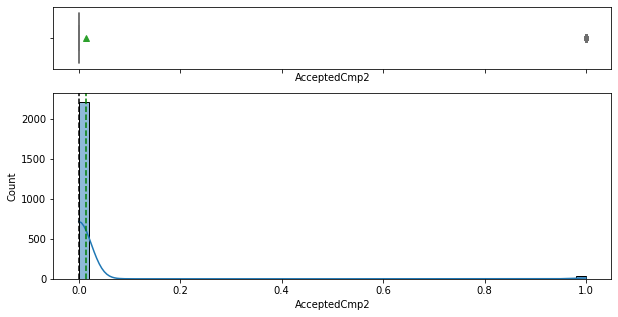

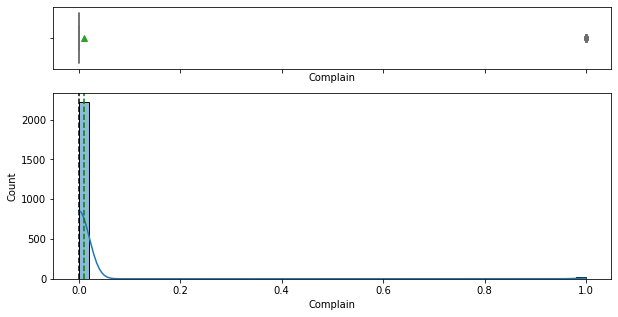

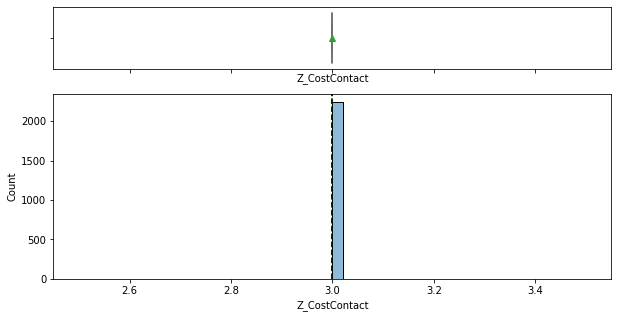

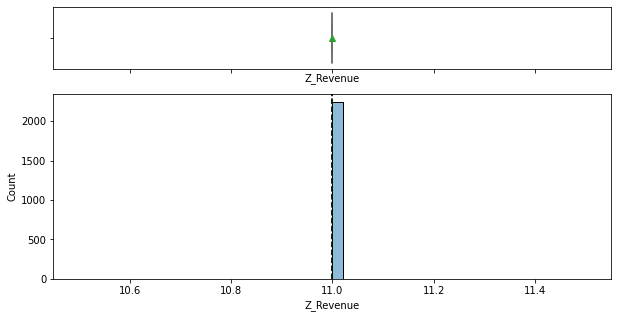

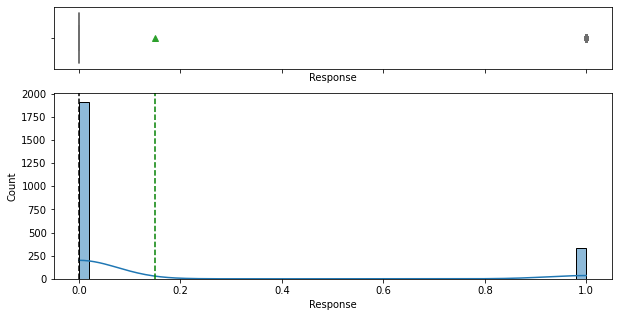

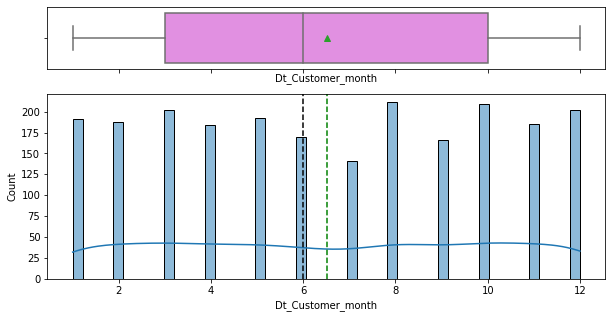

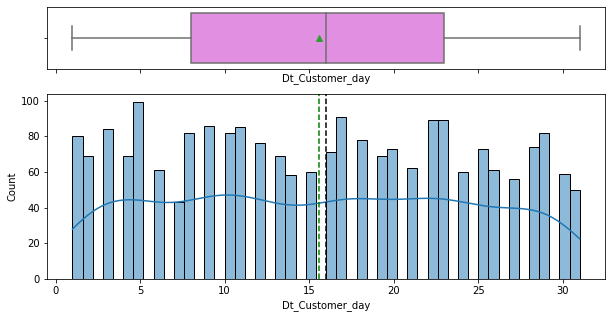

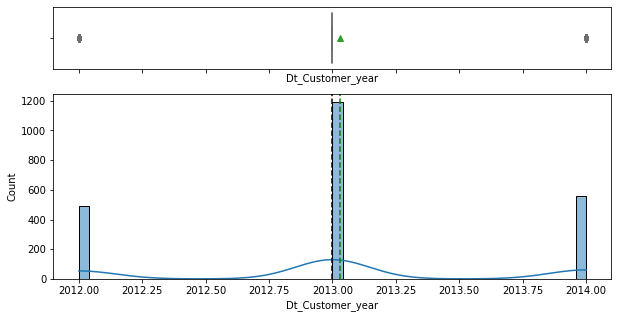

In [12]:
# advanced kde/hist plot with boxplot
def histogram_boxplot(data,feature,figsize=(12,7),kde=False, bins=None):
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows=2, sharex=True,gridspec_kw={"height_ratios" : (0.25, 0.75)},figsize=figsize)
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="violet")
    sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2,  bins=bins, palette="winter")
    #if bins else sns.histplot(
        #data=data, x=feature, kde=kde, ax=ax_hist2)
    ax_hist2.axvline(data[feature].mean(),color="green",linestyle="--")
    ax_hist2.axvline(data[feature].median(),color="black",linestyle="--")
for f in numericalfeat:
    histogram_boxplot(custseg,f,bins=50, kde=True, figsize=(10, 5))

<AxesSubplot:ylabel='Density'>

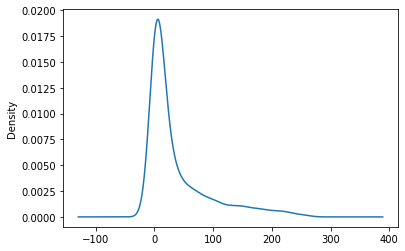

In [13]:
custseg.MntFishProducts.plot(kind='kde')

In [14]:
custseg.Dt_Customer_year.astype('O')

0       2012
1       2014
2       2013
3       2014
4       2014
        ... 
2235    2013
2236    2014
2237    2014
2238    2014
2239    2012
Name: Dt_Customer_year, Length: 2240, dtype: object

In [15]:
custseg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   int64         
 3   Marital_Status       2240 non-null   int64         
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

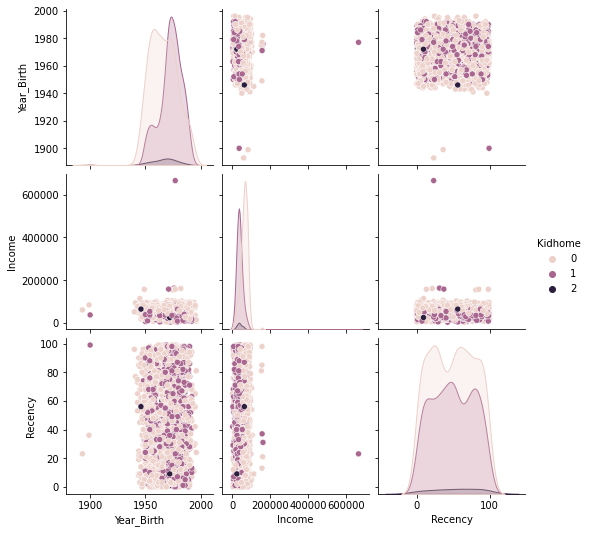

In [16]:
sns.pairplot(custseg[['Year_Birth','Income','Kidhome','Recency']],hue='Kidhome')

In [17]:
overt=np.zeros(custseg.shape[0])
for i in range(0,custseg.shape[0]):
    if (custseg.Income.values[i] >= 0) & (custseg.Income.values[i] <= 40000):
        overt[i]=0
    if (custseg.Income.values[i] > 40000) & (custseg.Income.values[i] <= 65000):
        overt[i]=1
    if (custseg.Income.values[i] > 65000) & (custseg.Income.values[i] <= 100000):
        overt[i]=2
    if (custseg.Income.values[i] > 100000) & (custseg.Income.values[i] <= 300000):
        overt[i]=3
    if (custseg.Income.values[i] > 300000) & (custseg.Income.values[i] <= 600000):
        overt[i]=4
custseg['Income_category']=overt

In [18]:
custseg['Income_category']

0       1.0
1       1.0
2       2.0
3       0.0
4       1.0
       ... 
2235    1.0
2236    1.0
2237    1.0
2238    2.0
2239    1.0
Name: Income_category, Length: 2240, dtype: float64

# Feature Enginnering:
 - Combine promotions and amount spent into single with sum
 - Drop certain features
 - create Age feature then categorize
 - Income missing values will be deemed its own category
 - Outlier consideriation to prevent bias model, corrleation covariance
 - missing values in income act as outlier, we can simply remove them ~ 1% of dataset
 - PCA

In [19]:
24/2240

0.010714285714285714

In [20]:
custseg["Total_Promotions"] = custseg["AcceptedCmp1"] + custseg["AcceptedCmp2"] + custseg["AcceptedCmp3"] + custseg["AcceptedCmp4"] + custseg["AcceptedCmp5"]

In [21]:
custseg["Total_Spent"] = custseg["MntWines"] + custseg["MntFruits"] + custseg["MntMeatProducts"] + custseg["MntFishProducts"] + custseg["MntSweetProducts"] + custseg["MntGoldProds"]

In [22]:
custseg["Children_Number"] = custseg["Kidhome"] + custseg["Teenhome"]

In [23]:
custseg.groupby('Income_category')['Total_Spent'].mean()

Income_category
0.0     106.299868
1.0     502.976485
2.0    1296.215686
3.0     893.583333
Name: Total_Spent, dtype: float64

In [24]:
custseg.groupby(['Income_category',"Children_Number"])['Total_Spent'].mean()

Income_category  Children_Number
0.0              0                   189.175000
                 1                    93.544843
                 2                    76.119048
                 3                   141.695652
1.0              0                   813.173913
                 1                   556.627660
                 2                   292.145455
                 3                   219.461538
2.0              0                  1436.894484
                 1                  1086.857143
                 2                   824.281250
                 3                  1397.250000
3.0              0                   994.333333
                 1                   833.500000
                 2                   107.000000
Name: Total_Spent, dtype: float64

In [25]:
custseg.groupby(['Income_category',"Children_Number"])['Total_Promotions'].mean()

Income_category  Children_Number
0.0              0                  0.108333
                 1                  0.087444
                 2                  0.101190
                 3                  0.086957
1.0              0                  0.304348
                 1                  0.200000
                 2                  0.136364
                 3                  0.153846
2.0              0                  0.791367
                 1                  0.419048
                 2                  0.250000
                 3                  0.500000
3.0              0                  1.333333
                 1                  0.000000
                 2                  0.000000
Name: Total_Promotions, dtype: float64

In [26]:
dropping = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "ID"
            , 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2'
             ,'Complain', 'Response', 'Kidhome', 'Teenhome', 'Recency',"MntWines","MntFruits",
            "MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds", "Dt_Customer_month" ,
            "Dt_Customer_day",  "Dt_Customer_year","Income_category" ]

In [27]:
custseg=custseg.drop(dropping,axis=1)

In [28]:
custseg["Age"] = 2022 - custseg["Year_Birth"]

In [29]:
custseg=custseg.drop("Year_Birth",axis=1)

In [30]:
custseg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2240 non-null   int64  
 1   Income               2216 non-null   float64
 2   NumDealsPurchases    2240 non-null   int64  
 3   NumWebPurchases      2240 non-null   int64  
 4   NumCatalogPurchases  2240 non-null   int64  
 5   NumStorePurchases    2240 non-null   int64  
 6   NumWebVisitsMonth    2240 non-null   int64  
 7   Total_Promotions     2240 non-null   int64  
 8   Total_Spent          2240 non-null   int64  
 9   Children_Number      2240 non-null   int64  
 10  Age                  2240 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 192.6 KB


In [31]:
custseg=custseg.drop(custseg[custseg.Age > 85].index,axis=0)

In [32]:
custseg=custseg.drop(custseg[custseg.Income > 600000].index,axis=0)

In [33]:
len(custseg[custseg.Income < 600000].values) 

2212

In [34]:
custseg=custseg.dropna(axis=0)

In [35]:
custseg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2239
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2212 non-null   int64  
 1   Income               2212 non-null   float64
 2   NumDealsPurchases    2212 non-null   int64  
 3   NumWebPurchases      2212 non-null   int64  
 4   NumCatalogPurchases  2212 non-null   int64  
 5   NumStorePurchases    2212 non-null   int64  
 6   NumWebVisitsMonth    2212 non-null   int64  
 7   Total_Promotions     2212 non-null   int64  
 8   Total_Spent          2212 non-null   int64  
 9   Children_Number      2212 non-null   int64  
 10  Age                  2212 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 207.4 KB


In [36]:
custseg.isnull().sum()

Education              0
Income                 0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Total_Promotions       0
Total_Spent            0
Children_Number        0
Age                    0
dtype: int64

<AxesSubplot:>

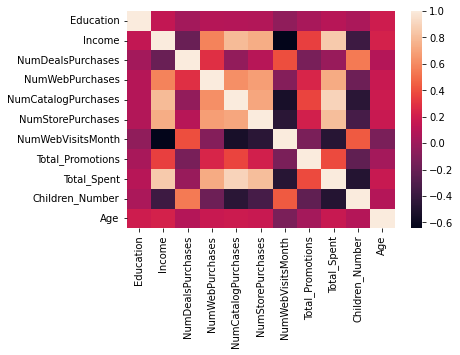

In [37]:
sns.heatmap(custseg.corr(method='spearman'))

In [38]:
c=custseg.corr(method='spearman')
c[c> 0.8]

,Education,Income,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Total_Promotions,Total_Spent,Children_Number,Age
Education,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.853119,NaN,NaN
NumDealsPurchases,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumWebPurchases,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumCatalogPurchases,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,0.893963,NaN,NaN
NumStorePurchases,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.806375,NaN,NaN
NumWebVisitsMonth,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
Total_Promotions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
Total_Spent,NaN,0.853119,NaN,NaN,0.893963,0.806375,NaN,NaN,1.000000,NaN,NaN
Children_Number,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


# total_spent highly correlated with income num store pirhc

In [39]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(custseg.values, i) for i in range(custseg.shape[1])]
vif["features"] = custseg.columns  

/Users/teacher/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/Users/teacher/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [40]:
vif

,VIF Factor,features
0,5.824826,Education
1,21.131376,Income
2,4.005274,NumDealsPurchases
3,5.663850,NumWebPurchases
4,5.357921,NumCatalogPurchases
5,8.905033,NumStorePurchases
6,7.449132,NumWebVisitsMonth
7,1.590076,Total_Promotions
8,10.426855,Total_Spent
9,4.979658,Children_Number


<AxesSubplot:>

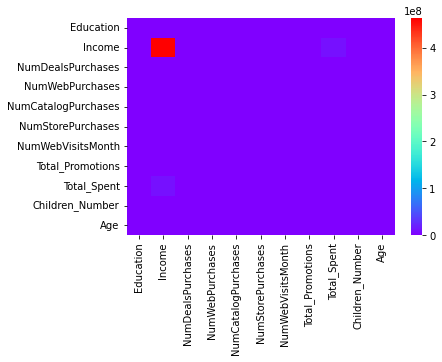

In [41]:
sns.heatmap(custseg.cov(),cmap='rainbow')

In [42]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled_custseg=sc.fit_transform(custseg.values)

In [43]:
scaled_custseg

array([[-0.35254334,  0.28710487,  0.35102992, ...,  1.67624537,
        -1.26459792,  1.01835202],
       [-0.35254334, -0.26088203, -0.16870113, ..., -0.96329696,
         1.4045725 ,  1.27478522],
       [-0.35254334,  0.9131964 , -0.68843217, ...,  0.28011009,
        -1.26459792,  0.33453017],
       ...,
       [-0.35254334,  0.23334696, -0.68843217, ...,  1.05205171,
        -1.26459792, -1.03311355],
       [ 0.53868622,  0.80317156, -0.16870113, ...,  0.39133608,
         0.06998729,  1.10382975],
       [ 1.42991579,  0.04229031,  0.35102992, ..., -0.72258398,
         1.4045725 ,  1.27478522]])

<AxesSubplot:>

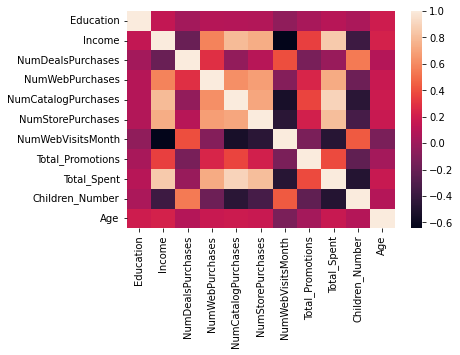

In [44]:
scaled_custseg=pd.DataFrame(scaled_custseg)
scaled_custseg.columns= custseg.columns
sns.heatmap(scaled_custseg.corr(method='spearman'))


<AxesSubplot:>

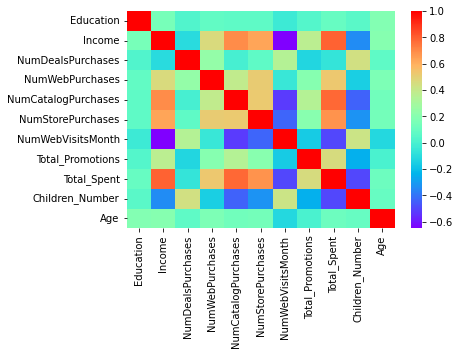

In [45]:
sns.heatmap(scaled_custseg.cov(),cmap='rainbow')

In [46]:
import numpy as np
from sklearn.decomposition import PCA
number_c=[]
nc=[0.85,0.90,0.95,0.99,0.9999]
for c,n in enumerate(nc):
    pca=PCA(n_components=n)
    pca.fit_transform(scaled_custseg.values)
    number_c.append(pca.components_.shape[0])
    
number_c=np.array(number_c)

Text(0, 0.5, 'explained var')

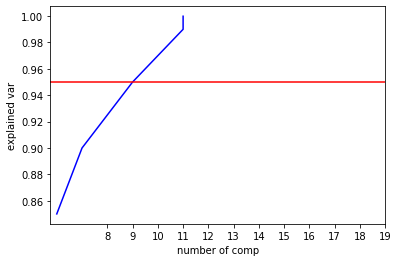

In [47]:
plt.plot(number_c,nc, color='b')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.xticks(np.arange(8, 20, step=1))
plt.xlabel('number of comp')
plt.ylabel('explained var')

In [48]:
import numpy as np
from sklearn.decomposition import PCA
number_c2=[]
nc2=[0.85,0.90,0.95,0.99,0.9999]
for c,n in enumerate(nc2):
    pca=PCA(n_components=n)
    pca.fit_transform(custseg.values)
    number_c2.append(pca.components_.shape[0])
    
number_c2=np.array(number_c2)

Text(0, 0.5, 'explained var')

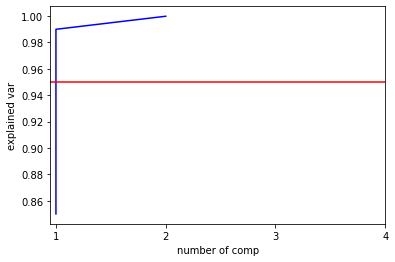

In [49]:
plt.plot(number_c2,nc2, color='b')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.xticks(np.arange(1, 5, step=1))
plt.xlabel('number of comp')
plt.ylabel('explained var')

In [50]:
# using the scaled data set I will choose 11 components reducing the dimension by 2 with 95% explained var 
pcascaled_custseg=PCA(n_components=nc2[2]).fit_transform(scaled_custseg.values)
pcascaled_custseg=pd.DataFrame(pcascaled_custseg)
pcascaled_custseg.columns=np.arange(0,9,1)
pcascaled_custseg


,0,1,2,3,4,5,6,7,8
0,2.122504,0.814975,0.544060,-0.320733,0.412293,-1.208151,2.358774,1.331455,-0.657420
1,-1.837716,0.015271,-1.348119,-0.613752,1.268304,0.739569,-0.085414,0.413468,-0.109073
2,1.763822,-0.166325,0.149987,-0.963541,-0.311215,-1.475265,-0.834096,-0.106917,0.449557
3,-2.022490,-0.970443,0.652960,0.014633,-0.629491,0.125811,-0.162266,-0.232222,0.178833
4,-0.046219,1.045205,0.010998,0.461638,-1.759011,0.662905,0.314384,-0.013160,0.712548
...,...,...,...,...,...,...,...,...,...
2207,0.974831,0.631108,0.436396,-0.338002,0.059300,-0.807737,-0.203098,1.532803,0.224288
2208,-0.351122,4.226140,-1.099626,1.127867,1.168156,0.890840,-0.494892,0.458597,0.529512
2209,1.651882,-1.189158,1.161377,0.464153,-0.419583,-0.206515,-0.510133,-1.936914,-1.038458
2210,1.830841,0.732564,-1.074315,-0.878706,-0.142244,-0.139432,-0.338461,-0.086796,-0.145820


In [51]:
len(custseg.columns)

11

In [52]:
pcascaled_custseg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2212 entries, 0 to 2211
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       2212 non-null   float64
 1   1       2212 non-null   float64
 2   2       2212 non-null   float64
 3   3       2212 non-null   float64
 4   4       2212 non-null   float64
 5   5       2212 non-null   float64
 6   6       2212 non-null   float64
 7   7       2212 non-null   float64
 8   8       2212 non-null   float64
dtypes: float64(9)
memory usage: 155.7 KB


In [53]:
vif2 = pd.DataFrame()
vif2["VIF Factor"] = [variance_inflation_factor(pcascaled_custseg.values, i) for i in range(pcascaled_custseg.shape[1])]
vif2["features"] = pcascaled_custseg.columns

In [54]:
vif2

,VIF Factor,features
0,1.0,0
1,1.0,1
2,1.0,2
3,1.0,3
4,1.0,4
5,1.0,5
6,1.0,6
7,1.0,7
8,1.0,8


In [55]:
!pip install threadpoolctl --upgrade

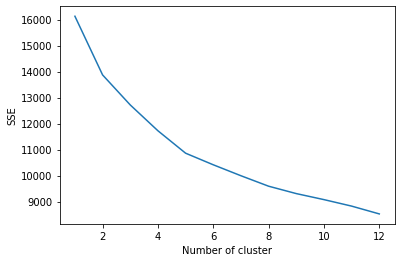

In [56]:
from sklearn.cluster import KMeans
sse = {}
for k in range(0, 12):
    kmeans = KMeans(n_clusters=k+2)
    kmeans.fit(pcascaled_custseg.values)
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(np.arange(1,13,1), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [57]:
custsegcop=custseg.copy()

In [58]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(pcascaled_custseg.values)
custsegcop['Kmeansc']=kmeans.predict(pcascaled_custseg.values)

- Compare plethora of cluster techniuqes DBSCAN, Birch, OPTICS


In [59]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import DBSCAN, Birch, OPTICS
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score as sc

def silhouette_scorer(estimator, X):
    clusters = estimator.fit_predict(X)
    score = sc(X, clusters,metric='euclidean')
    return score


clusterer=[
   # LocalOutlierFactor(),
        KMeans(),
           DBSCAN(),
            Birch(),
    GaussianMixture()
]

names=[
    #"LocalOutlierFactor",
        "KMeans",
       "DBSCAN",
    "Birch",

 # "GaussianMixture"
]

massiveCV={
#"LocalOutlierFactor":{ "n_neighbors": np.arange(3,15,1),
#                      "contamination":np.arange(0.1,0.5,0.1),
 #                     "leaf_size":[10,20,30,40]},

"KMeans":{"n_clusters":np.arange(2,11,1),
         "tol":[1e-4,2e-4,3e-4]},
    
"DBSCAN":{ "eps":[0.4,0.5,0.6,0.7],
            "min_samples":[4,5,6]},
        #"leaf_size":[20,30,40]},

"Birch":{"threshold":np.arange(0.1,0.8,0.1),
        "n_clusters":np.arange(2,12,1),
       "branching_factor":[50,60]
        },
        
                                
                    
#"OPTICS":{#"eps":[0.4,0.5,0.6,0.7],
 #           "min_samples":[5,6],
 #        "leaf_size":[25,30,35],
        # }

#"GaussianMixture":{ "n_components":[1],
   #                   "tol":[1e-3],
  #                "init_params":["kmeans", "k-means++", "random"]
              #  }
}

            

massivecv2=[]
modelss=[]
resframe=pd.DataFrame()
for name,clf in zip(names,clusterer):
    cv = [(slice(None), slice(None))]
    
    gs = GridSearchCV(estimator=clf, param_grid=massiveCV[name], 
                  scoring=silhouette_scorer, cv=cv, n_jobs=-1)
    
    gs.fit(pcascaled_custseg)
   
    modelss.append(gs)
    
    print(gs.best_params_)
    massivecv2.append(gs.best_params_)

{'n_clusters': 2, 'tol': 0.0001}
{'eps': 0.4, 'min_samples': 6}
{'branching_factor': 60, 'n_clusters': 2, 'threshold': 0.30000000000000004}


In [60]:
for name in names:
    
    if name==names[0]:
        cf1=KMeans(**massivecv2[0])
        resframe[name]=cf1.fit_predict(pcascaled_custseg)
        print("silhouette score for " + name,format(silhouette_scorer(cf1,pcascaled_custseg)))
    
    elif name==names[1]:
        cf2=DBSCAN(**massivecv2[1])
        resframe[name]=cf2.fit_predict(pcascaled_custseg)
        print("silhouette score for " + name,format(silhouette_scorer(cf2,pcascaled_custseg)))
   
    elif name==names[2]:
        cf3=Birch(**massivecv2[2])
        resframe[name]=cf3.fit_predict(pcascaled_custseg)
        print("silhouette score for " + name,format(silhouette_scorer(cf3,pcascaled_custseg)))
    
 #   elif name==names[3]:
   #     cf4=OPTICS(**massivecv2[3])
   #     resframe[name]= cf4.fit_predict(pcascaled_custseg)
   #     print("silhouette score for " + name,format(silhouette_scorer(cf4,pcascaled_custseg)))

silhouette score for KMeans 0.302770412235577
silhouette score for DBSCAN -0.1556217905096328
silhouette score for Birch 0.2898617017150383


In [61]:
# consider if n_clusters=6 in accordance with elbow sse method
cv6={'n_clusters':6,'tol':0.0002}
cf5=KMeans(**cv6)
resframe['Kmeans2']=cf5.fit_predict(pcascaled_custseg)
print("silhouette score for " + '6 cluster k means {}'.format(silhouette_scorer(cf5,pcascaled_custseg)))

silhouette score for 6 cluster k means 0.17742536774329515


In [62]:
cv7={'branching_factor': 60, 'n_clusters': 6, 'threshold': 0.30000000000000004}
cf6=Birch(**cv7)
resframe['BIRCH2']=cf6.fit_predict(pcascaled_custseg)
print("silhouette score for " + '6 cluster k means {}'.format(silhouette_scorer(cf6,pcascaled_custseg)))

silhouette score for 6 cluster k means 0.12775896071665285


In [63]:
for name, w in zip(names,range(0,3)):
    print("the unique cluser values for "+ name+" are {}".format(resframe[name].unique()))



the unique cluser values for KMeans are [0 1]
the unique cluser values for DBSCAN are [-1  0  2  1  3  4]
the unique cluser values for Birch are [0 1]


In [64]:
custseg

,Education,Income,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Total_Promotions,Total_Spent,Children_Number,Age
0,2,58138.0,3,8,10,4,7,0,1617,0,65
1,2,46344.0,2,1,1,2,5,0,27,2,68
2,2,71613.0,1,8,2,10,4,0,776,0,57
3,2,26646.0,2,2,0,4,6,0,53,1,38
4,4,58293.0,5,5,3,6,5,0,422,1,41
...,...,...,...,...,...,...,...,...,...,...,...
2235,2,61223.0,2,9,3,4,5,0,1341,1,55
2236,4,64014.0,7,8,2,5,7,1,444,3,76
2237,2,56981.0,1,2,3,13,6,1,1241,0,41
2238,3,69245.0,2,6,5,10,3,0,843,1,66


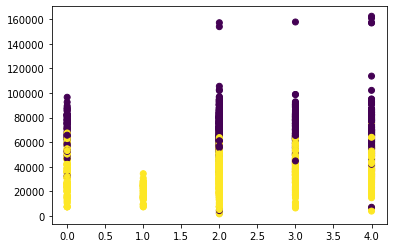

In [65]:
plt.scatter(custseg.Education,custseg.Income, c=resframe.KMeans)

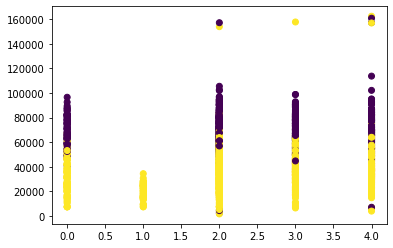

In [66]:
plt.scatter(custseg.Education,custseg.Income, c=resframe.Birch)

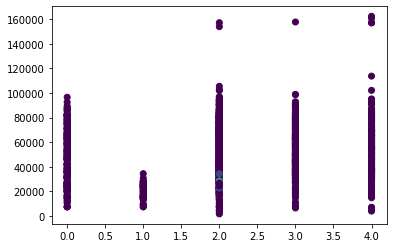

In [67]:
plt.scatter(custseg.Education,custseg.Income, c=resframe.DBSCAN)

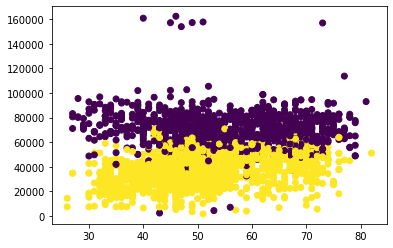

In [68]:
plt.scatter(custseg.Age,custseg.Income, c=resframe.KMeans)

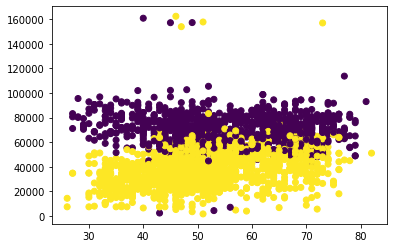

In [69]:
plt.scatter(custseg.Age,custseg.Income, c=resframe.Birch)

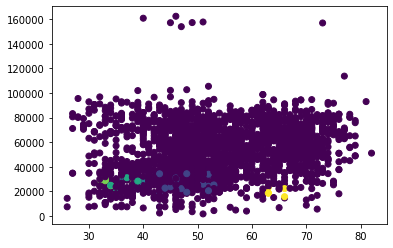

In [70]:
plt.scatter(custseg.Age,custseg.Income, c=resframe.DBSCAN)

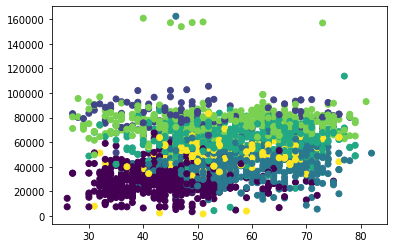

In [71]:
plt.scatter(custseg.Age,custseg.Income, c=resframe.Kmeans2)

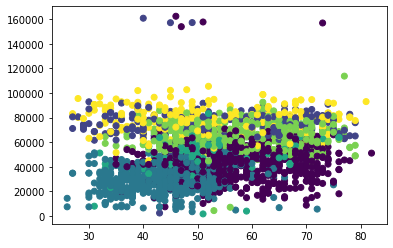

In [72]:
plt.scatter(custseg.Age,custseg.Income, c=resframe.BIRCH2)

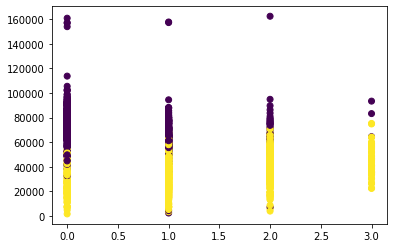

In [73]:
plt.scatter(custseg.Children_Number,custseg.Income, c=resframe.KMeans)

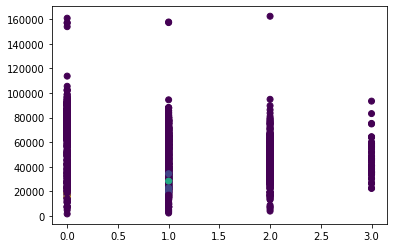

In [74]:
plt.scatter(custseg.Children_Number,custseg.Income, c=resframe.DBSCAN)

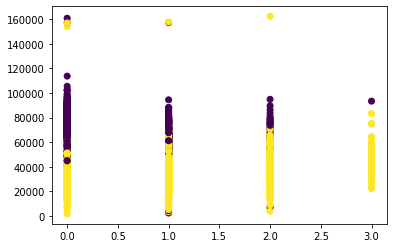

In [75]:
plt.scatter(custseg.Children_Number,custseg.Income, c=resframe.Birch)

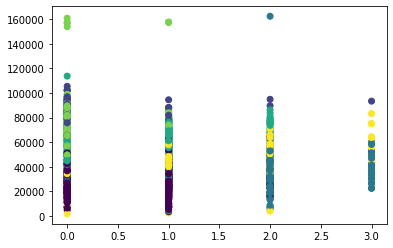

In [76]:
plt.scatter(custseg.Children_Number,custseg.Income, c=resframe.Kmeans2)

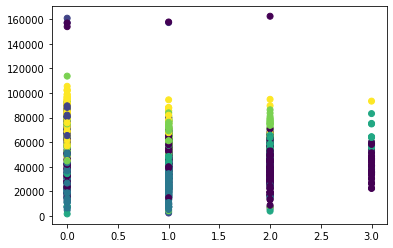

In [77]:
plt.scatter(custseg.Children_Number,custseg.Income, c=resframe.BIRCH2)

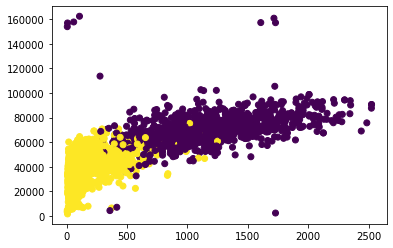

In [78]:
plt.scatter(custseg.Total_Spent,custseg.Income, c=resframe.KMeans)

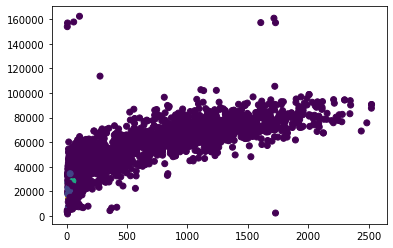

In [79]:
plt.scatter(custseg.Total_Spent,custseg.Income, c=resframe.DBSCAN)

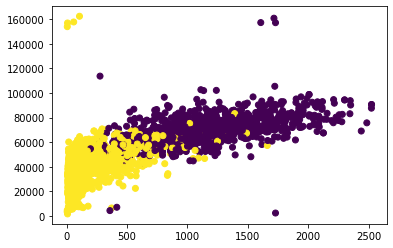

In [80]:
plt.scatter(custseg.Total_Spent,custseg.Income, c=resframe.Birch)

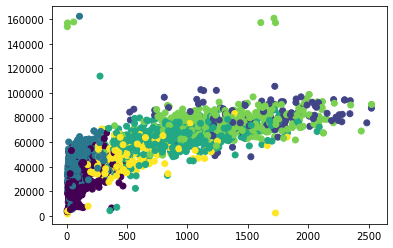

In [81]:
plt.scatter(custseg.Total_Spent,custseg.Income, c=resframe.Kmeans2)

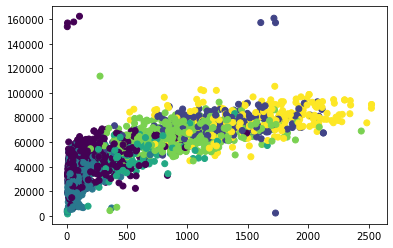

In [82]:
plt.scatter(custseg.Total_Spent,custseg.Income, c=resframe.BIRCH2)

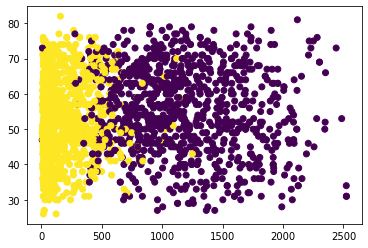

In [83]:
plt.scatter(custseg.Total_Spent,custseg.Age, c=resframe.KMeans)

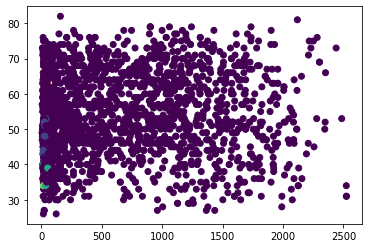

In [84]:
plt.scatter(custseg.Total_Spent,custseg.Age, c=resframe.DBSCAN)

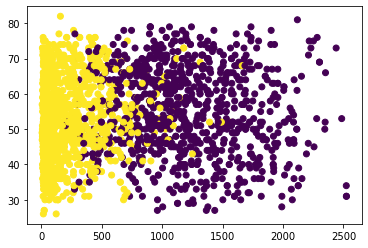

In [85]:
plt.scatter(custseg.Total_Spent,custseg.Age, c=resframe.Birch)

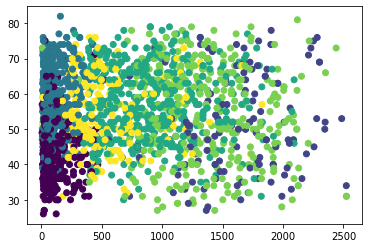

In [86]:
plt.scatter(custseg.Total_Spent,custseg.Age, c=resframe.Kmeans2)

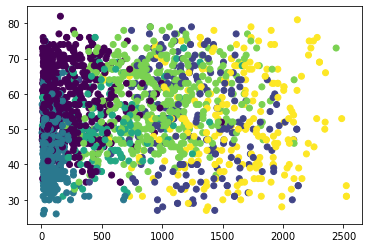

In [87]:
plt.scatter(custseg.Total_Spent,custseg.Age, c=resframe.BIRCH2)

# Hyperparameter gridsearch on your own

In [88]:
def make_generator(parameters):
    if not parameters:  
        yield dict()
    
    else:
        key_to_iterate = list(parameters.keys())[0]
        next_round_parameters = {p : parameters[p] for p in parameters if p != key_to_iterate}
        
        for val in parameters[key_to_iterate]:
            
            for pars in make_generator(next_round_parameters):
                
                temp_res = pars
                temp_res[key_to_iterate] = val
                yield temp_res

def hypersearch(fxp, param_grid,x):
    scoreh=[]
    pm=[]
    
    for params in make_generator(param_grid):
        params.update(fxp)
        clf=KMeans(**params)
        pred=clf.fit_predict(x)
        scoreh.append(silhouette_scorer(clf, x))
        pm.append(params)
    
    scoreh=np.array(scoreh)
    
    pm=np.array(pm)
    
    mindex=np.where(scoreh==max(scoreh))
    
    print("The silhoutette score and the bestparams are given by")
    
    return scoreh[mindex], pm[mindex]

In [89]:
fixed_params = {"max_iter":300 } 

param_grid = {"n_clusters": range(2, 11)}

hypersearch(fixed_params,param_grid,pcascaled_custseg)

The silhoutette score and the bestparams are given by


(array([0.30252325]),
 array([{'n_clusters': 2, 'max_iter': 300}], dtype=object))

In [ ]:
from umap.umap_ import UMAP

In [ ]:
u=UMAP().fit_transform(pcascaled_custseg)

In [ ]:
u2= UMAP().fit_transform(scaled_custseg.values)

In [ ]:
u.shape

In [ ]:
scaled_custseg

In [ ]:
plt.scatter(u[:,0],u[:,1],c=resframe.BIRCH2.values)

In [ ]:
from matplotlib.figure import Figure
class WatermarkFigure(Figure):
    """A figure with a text watermark."""

    def __init__(self, *args, watermark=None, **kwargs):
        super().__init__(*args, **kwargs)

        if watermark is not None:
            bbox = dict(boxstyle='square', lw=3, ec='gray',
                        fc=(0.9, 0.9, .9, .5), alpha=0.5)
def UMAPCluster(df, umap_u,FigureClass):
    fig=plt.figure(FigureClass=FigureClass)
    figs, axs = fig.subplots(len(df.columns),1)
    
    for n, c  in enumerate(df.columns):
        axs[n].scatter(umap_u[:,0],umap_u[:,1],c=df[c].values)
        fig.show()

In [ ]:
UMAPCluster(pcascaled_custseg,u,WatermarkFigure)